### 2. Google+ network
In this part, we will explore the structure of the Google+ network. The dataset for creating the network can be found in the link below: http://snap.stanford.edu/data/egonets-Gplus.html Create directed personal networks for users who have more than 2 circles. The data required to create such personal networks can be found in the file named gplus.tar.gz.

In [1]:
library(igraph)


Attaching package: ‘igraph’

The following objects are masked from ‘package:stats’:

    decompose, spectrum

The following object is masked from ‘package:base’:

    union



In [2]:
file_path = "~/Desktop/232E/Project2/gplus/"
file_names = list.files(file_path)
all_egos_id = unique(sub("^([^.]*).*", "\\1", file_names))

cat("Total Number of Ego Nodes = ", length(all_egos_id))

Total Number of Ego Nodes =  132

- **Question 18**: How many personal networks are there?

In [3]:
pnetwork_ids = numeric()
for (id in all_egos_id){
    circles_file = paste(file_path , id, ".circles", sep = "")
    circles_connect = file(circles_file , open="r")
    circles_content = readLines(circles_connect)
    close(circles_connect)
  
    # check if greater than 2
    if(length(circles_content) > 2)
        pnetwork_ids = c(pnetwork_ids, id)
}
cat("Personal networks = ", length(pnetwork_ids))

Personal networks =  57

- **Question 19**: For the 3 personal networks (node ID given below), plot the in-degree and out-degree distribution of these personal networks. Do the personal networks have a similar in and out degree distribution. In this question, you should have 6 plots.
 - 109327480479767108490
 - 115625564993990145546
 - 101373961279443806744

In [4]:
chosen_ids = c('109327480479767108490','115625564993990145546','101373961279443806744')
gnetworks = list()
cnetworks = list()
for (id in chosen_ids){
    edges_file = paste(file_path , id  , ".edges" , sep="")
    circles_file = paste(file_path , id , ".circles" , sep="")
  
    circles_connect = file(circles_file , open="r")
    circles_content = readLines(circles_connect)
    
    #circles = list()
    circles = vector()
    for (i in 1:length(circles_content)) {
        circle_nodes = strsplit(circles_content[i],"\t")
        circles = c(circles, list(circle_nodes[[1]][-1]))
    }
    close(circles_connect)
    
    cnetworks = c(cnetworks, list(circles))
    
    g_network = read.graph(edges_file , format = "ncol" , directed=TRUE)
    g_network = add.vertices(g_network, nv = 1, name = id)

    ego_node_index = which(V(g_network)$name==id) 
    add_edge_list = c()
    for (vertex in 1:(vcount(g_network) - 1)) {
        add_edge_list = c(add_edge_list, c(ego_node_index, vertex))
    }
  
    g_network = add_edges(g_network, add_edge_list)
    gnetworks = c(gnetworks, list(g_network))
}
cat('Finish building graph \n')

Finish building graph 


In [73]:
for (g_network in gnetworks){
    g_degree_dis_in = degree_distribution(g_network, cumulative = FALSE, mode = 'in')
    g_degree_dis_out = degree_distribution(g_network, cumulative = FALSE, mode = 'out')
}

degree in distribution =  0.00129199 0 0 0 0.002583979 0.01033592 0.005167959 0.1873385 0.06589147 0.05943152 0.07105943 0.09431525 0.0878553 0.07235142 0.05684755 0.04521964 0.0245478 0.02067183 0.03100775 0.02067183 0.01033592 0.009043928 0.007751938 0.01033592 0.005167959 0.009043928 0.01033592 0.006459948 0.002583979 0.006459948 0.01033592 0.002583979 0 0.005167959 0.005167959 0.006459948 0.00129199 0.002583979 0.00129199 0.00129199 0.00129199 0 0.003875969 0.002583979 0.002583979 0.00129199 0.00129199 0.00129199 0 0 0.002583979 0 0.00129199 0.00129199 0 0 0 0.00129199 0 0.002583979 0 0 0 0 0 0 0.00129199 0 0 0 0 0 0 0.00129199 0 0 0 0 0.00129199 0 0 0 0 0 0 0 0 0 0 0.00129199 0 0.00129199degree out distribution =  0.5555556 0.07881137 0.0374677 0.02971576 0.02842377 0.02325581 0.01421189 0.02067183 0.02067183 0.007751938 0.01550388 0.009043928 0.002583979 0.01033592 0.009043928 0.003875969 0.01033592 0.003875969 0.01679587 0.007751938 0.005167959 0.002583979 0.003875969 0.00645994

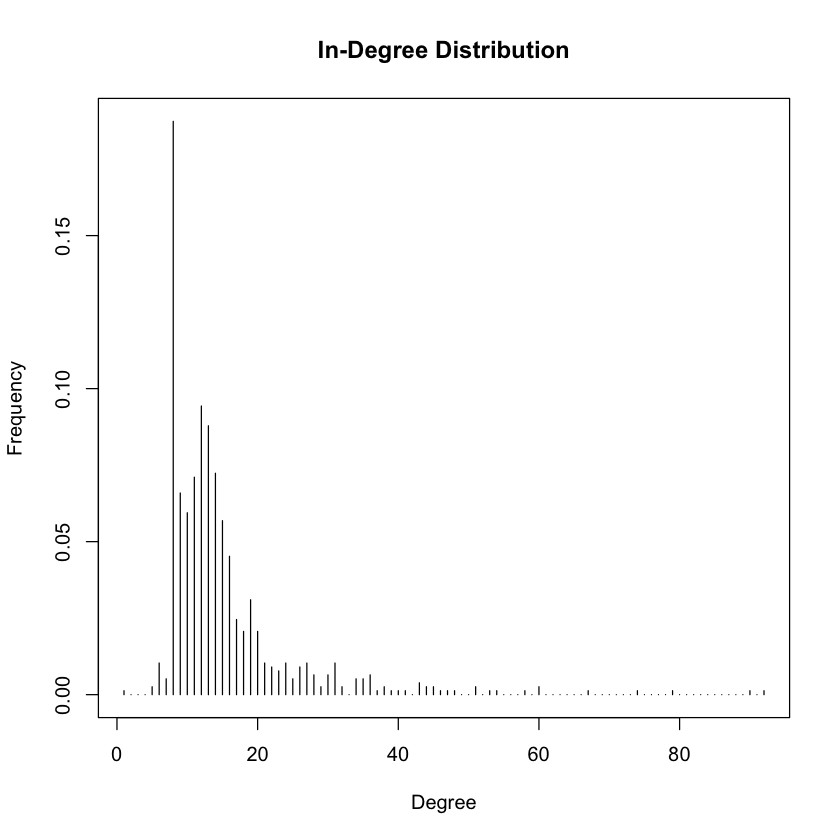

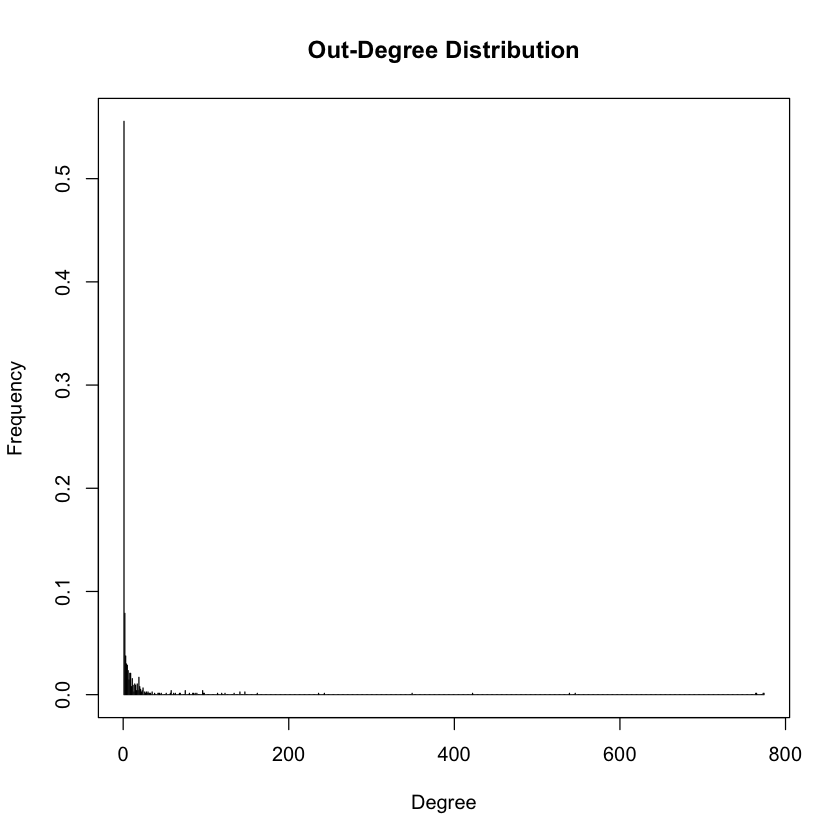

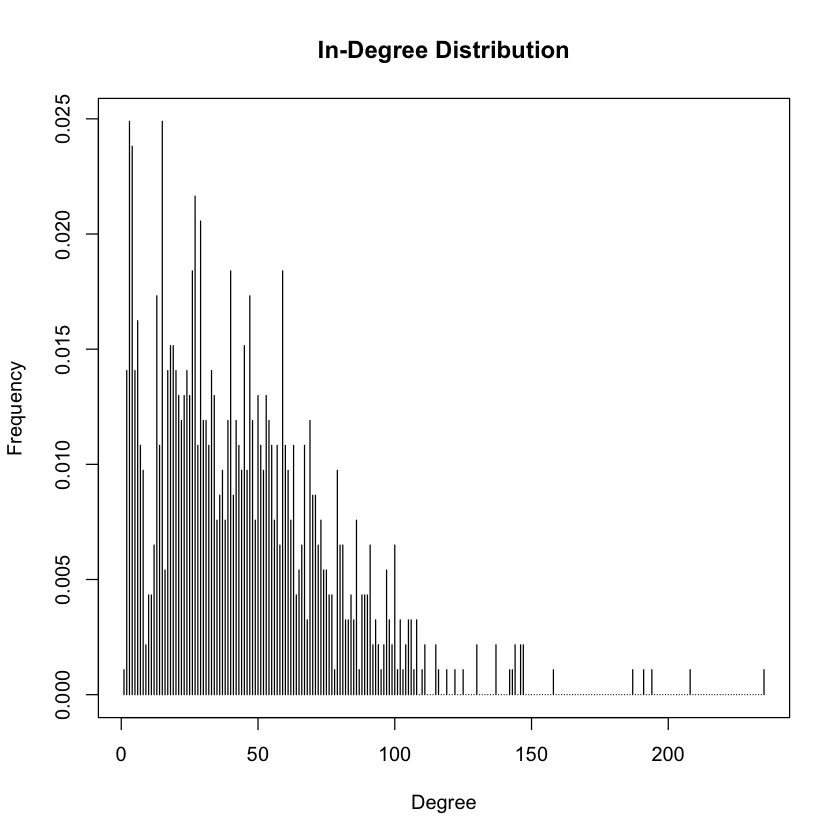

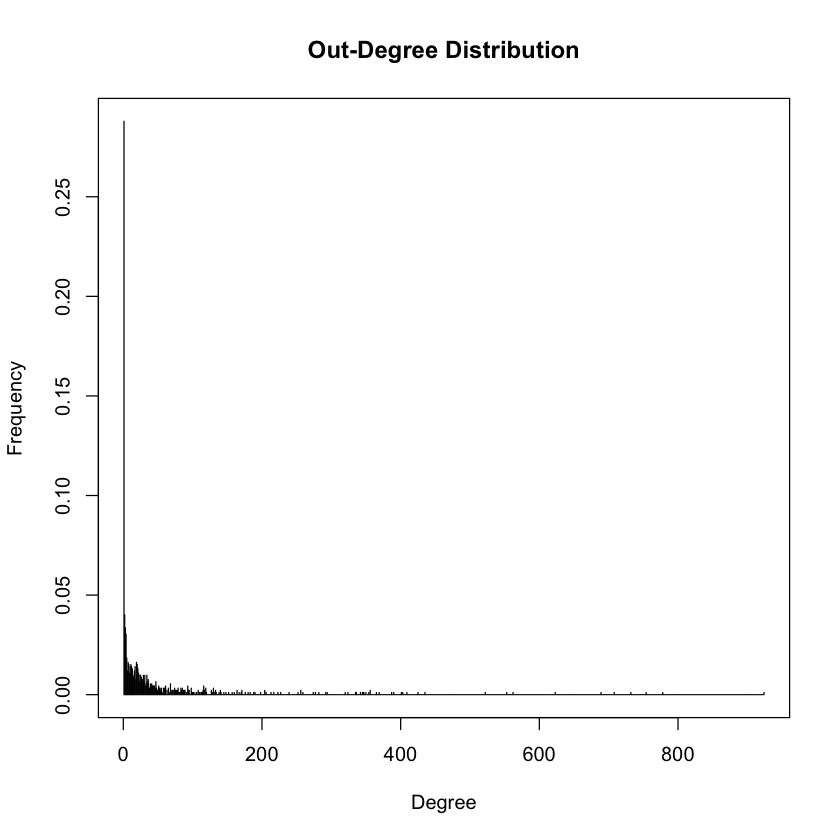

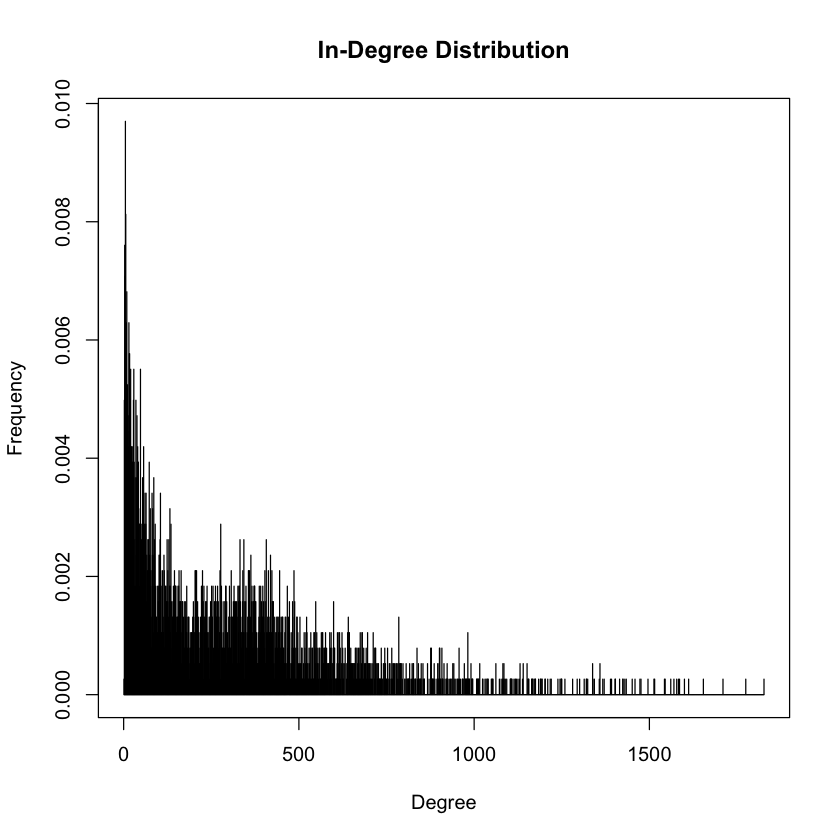

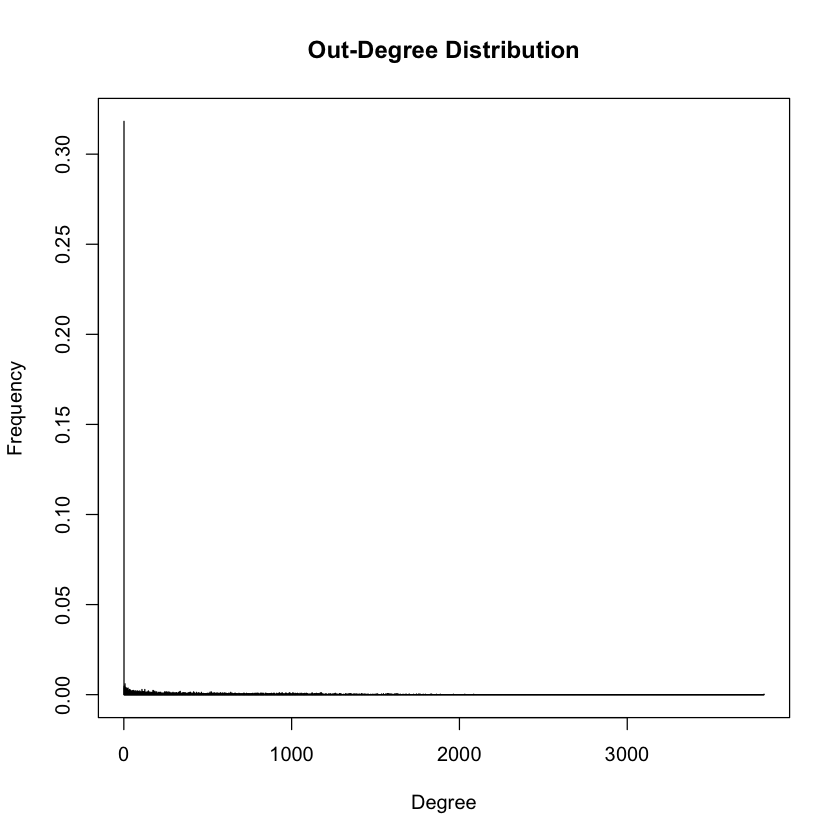

In [5]:
#par(mfrow = c(3, 2))
for (g_network in gnetworks){
    g_degree_dis_in = degree_distribution(g_network, cumulative = FALSE, mode = 'in')
    g_degree_dis_out = degree_distribution(g_network, cumulative = FALSE, mode = 'out')
    degree_in = as.list(g_degree_dis_in)
    n_in = 1:length(degree_in)
    degree_out = as.list(g_degree_dis_out)
    n_out = 1:length(degree_out)
    plot(n_in, degree_in, type = "h", xlab="Degree", ylab="Frequency", main="In-Degree Distribution")
    plot(n_out, degree_out, type = "h", xlab="Degree", ylab="Frequency", main="Out-Degree Distribution")
    #cat('degree in distribution = ', g_degree_dis_in)
    #cat('degree out distribution = ', g_degree_dis_out)
}

#### 2.1 Community structure of personal networks
In this part of the project, we will explore the community structure of the personal networks that we created and explore the connections between communities and user circles.

- **Question 20**: For the 3 personal networks picked in question 19, extract the community structure of each personal network using Walktrap community detection algorithm. Report the modularity scores and plot the communities using colors. Are the modularity scores similar? In this question, you should have 3 plots.

In [7]:
for (g_network in gnetworks){
    walktrap_comm = walktrap.community(g_network)
    modularity_n = modularity(walktrap_comm)
    cat('modularity:', modularity_n, '\n')
    #plot community
}
cat('Finished ploting community')

modularity: 0.2527654 
modularity: 0.3194726 
modularity: 0.1910903 
Finished ploting community

modularity: 0.2527654 
modularity: 0.3194726 


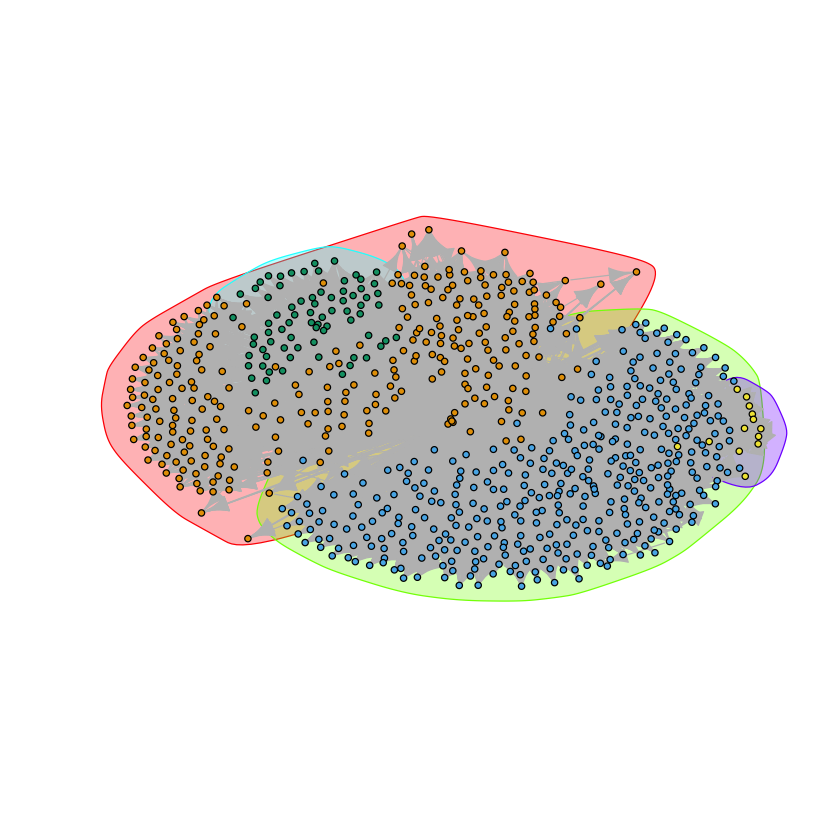

modularity: 0.1910903 


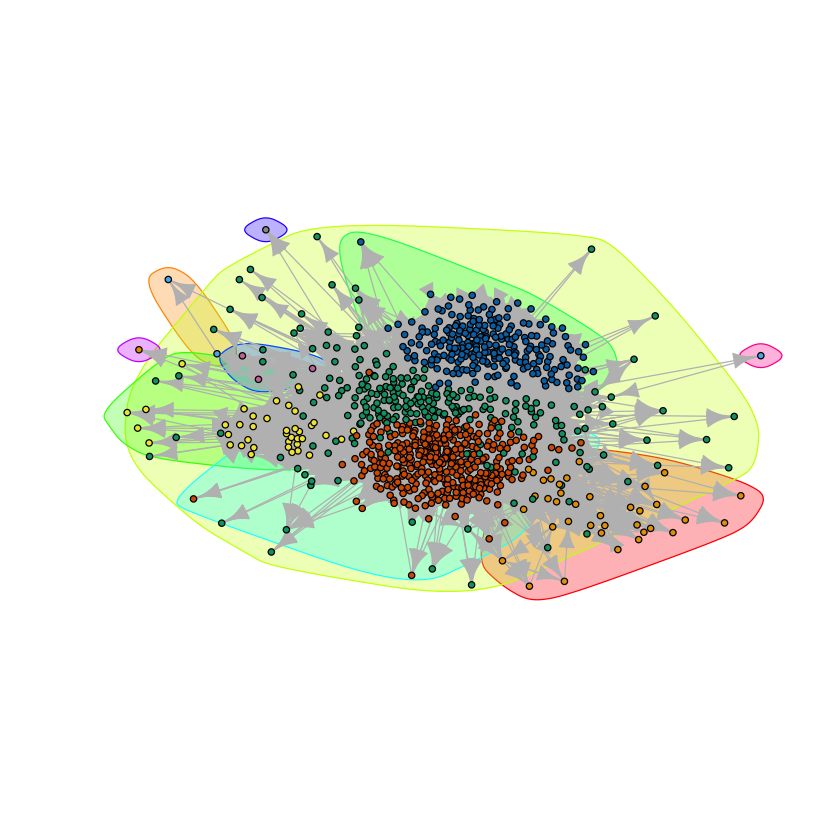

Finished ploting community

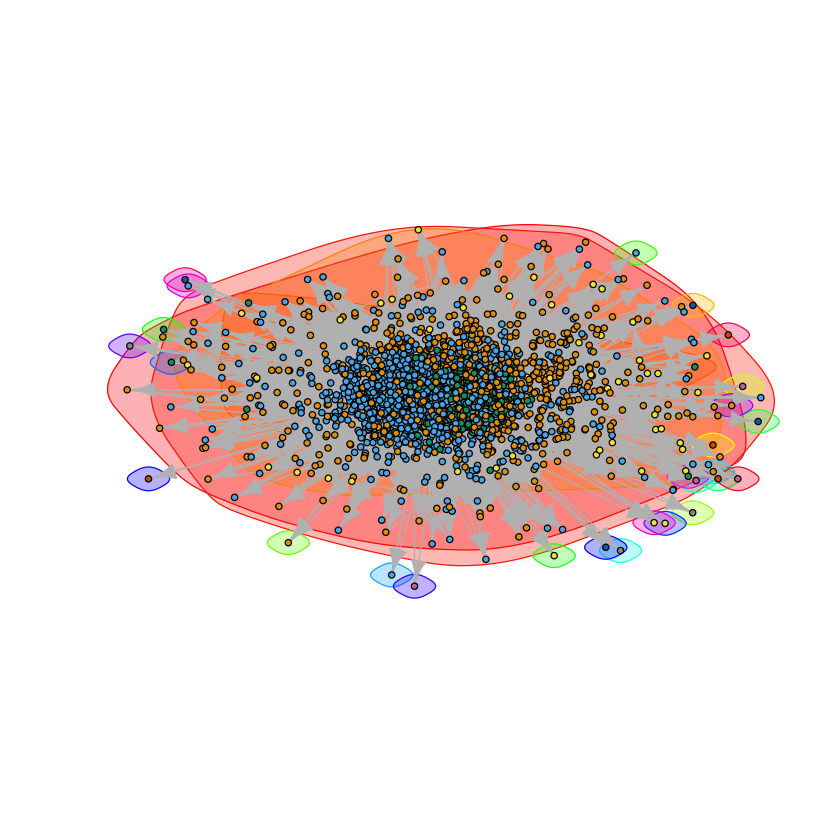

In [8]:
for (g_network in gnetworks){
    walktrap_comm = walktrap.community(g_network)
    modularity_n = modularity(walktrap_comm)
    cat('modularity:', modularity_n, '\n')
    
    plot(walktrap_comm, g_network, vertex.size = 2 , asp = 9/16, vertex.label=NA , edge.color = "grey", layout=layout.fruchterman.reingold)
    #plot community
}
cat('Finished ploting community')

- **Question 21**: Based on the expression for h and c, explain the meaning of homogeneity and completeness in words.

- **Question 22**: Compute the h and c values for the community structures of the 3 personal network (same nodes as question 19). Interpret the values and provide a detailed explanation.

In [9]:
for (i in 1:length(chosen_ids)){
    #BUILD CIRCLE MAP
    g_network = gnetworks[[i]]
    c_network = cnetworks[[i]]
    
    vector_a = vector()
    vector_circle = vector()
    for (m in 1:length(c_network)){
        vector_a = c(vector_a, length(c_network[[m]]))
        vector_circle = c(vector_circle, c_network[[m]])
    }
    vector_circle = unique(vector_circle)
    N = length(vector_circle)
    cat('N is', N, '\n')
    
    #cat('vector_a', vector_a,'\n')
    length_a = length(vector_a)
    
    walktrap_comm = walktrap.community(g_network)
    walk_member = walktrap_comm$membership
    vector_b = vector()
    
    for (m in 1:max(walk_member)){
        community_nodes = V(g_network)$name[which(walk_member == m)]
        
        vector_b = c(vector_b, length(intersect(community_nodes, vector_circle)))
    }
    #cat('vector_b',vector_b,'\n')
    length_b = length(vector_b)
    

    H_C = 0
    H_K = 0
    for (i in 1:length_a){
        H_C = H_C - vector_a[i]/N*log(vector_a[i]/N)
    }
    
    for (j in 1:length_b){
        if(vector_b[j]!=0)
            H_K = H_K - vector_b[j]/N*log(vector_b[j]/N)
    }
    
    matrix_c = matrix(0, nrow=length_b, ncol=length_a)
    H_CK = 0
    H_KC = 0
    for (j in 1:length_b){
        community_nodes = V(g_network)$name[which(walk_member == j)]
        for (i in 1:length_a){
            matrix_c[j,i] = length(intersect(community_nodes, c_network[[i]]))
        }
    }
    for (j in 1:length_b){
        for (i in 1:length_a){
            if (matrix_c[j,i] != 0){
            H_CK = H_CK - matrix_c[j,i]/N * log(matrix_c[j,i]/vector_b[j])
            H_KC = H_KC - matrix_c[j,i]/N * log(matrix_c[j,i]/vector_a[i])
            }
        }
    }
    h = 1-H_CK/H_C
    c = 1-H_KC/H_K
    cat('H_C is ',H_C,'\n')
    cat('H_K is', H_K,'\n')
    cat('H_CK is ',H_CK,'\n')
    cat('H_KC is', H_KC,'\n')
    cat('h is ',h,'\n')
    cat('c is', c,'\n')
    cat('=====================\n')
}

N is 764 
H_C is  1.050779 
H_K is 1.005208 
H_CK is  0.1556361 
H_KC is 0.6736162 
h is  0.8518851 
c is 0.3298739 
N is 727 
H_C is  8.465147 
H_K is 1.081191 
H_CK is  4.639829 
H_KC is 4.783148 
h is  0.4518903 
c is -3.423962 
N is 521 
H_C is  0.38432 
H_K is 0.4933306 
H_CK is  0.3828339 
H_KC is 1.235417 
h is  0.003866707 
c is -1.504238 
